# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t60_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,138.476144,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
0,526.0,743.0,823.0,905.0,984.0,926.0,1047.0,1134.0,1234.0,1248.0,...,2410.0,2506.0,2467.0,2446.0,2486.0,2494.0,2514.0,2583.0,2480.0,2580.0
1,538.0,754.0,798.0,878.0,979.0,998.0,1077.0,1090.0,1205.0,1186.0,...,2493.0,2499.0,2461.0,2595.0,2526.0,2518.0,2460.0,2526.0,2566.0,2580.0
2,548.0,694.0,884.0,888.0,970.0,975.0,1016.0,1103.0,1301.0,1300.0,...,2494.0,2609.0,2515.0,2619.0,2658.0,2577.0,2520.0,2632.0,2651.0,2713.0
3,554.0,705.0,745.0,833.0,930.0,935.0,1035.0,1122.0,1243.0,1258.0,...,2571.0,2597.0,2544.0,2622.0,2554.0,2698.0,2562.0,2703.0,2683.0,2911.0
4,602.0,719.0,805.0,968.0,1065.0,980.0,1134.0,1140.0,1264.0,1187.0,...,2585.0,2645.0,2771.0,2632.0,2680.0,2674.0,2636.0,2686.0,2749.0,2760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,486.0,650.0,721.0,860.0,925.0,875.0,980.0,1159.0,1155.0,1166.0,...,1425.0,1529.0,1518.0,1578.0,1537.0,1627.0,1637.0,1576.0,1567.0,1645.0
683,521.0,708.0,735.0,843.0,970.0,937.0,1028.0,1014.0,1155.0,1125.0,...,1543.0,1597.0,1552.0,1570.0,1609.0,1539.0,1543.0,1564.0,1619.0,1684.0
684,507.0,731.0,791.0,867.0,922.0,847.0,1021.0,1073.0,1181.0,1098.0,...,1484.0,1613.0,1597.0,1635.0,1564.0,1589.0,1636.0,1618.0,1571.0,1639.0
685,585.0,649.0,801.0,809.0,883.0,888.0,998.0,1050.0,1224.0,1251.0,...,1574.0,1652.0,1582.0,1615.0,1547.0,1642.0,1634.0,1716.0,1569.0,1592.0


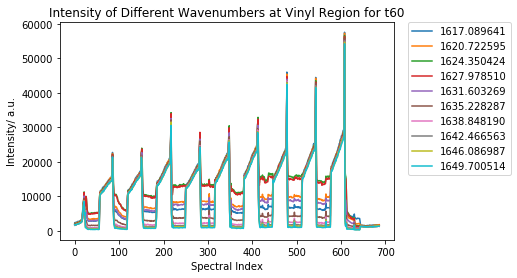

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t60')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1627.978510'] --> When using loc.
df.columns.get_loc('1627.978510') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1627.978510'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

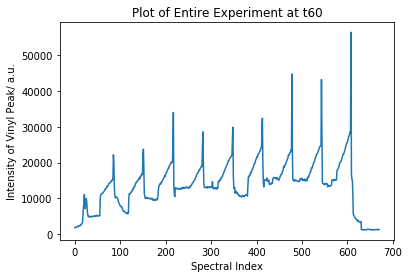

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:670,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t60')
plt.show()

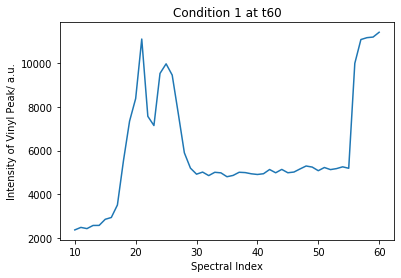

In [6]:
# Condition
df.loc[10:60,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t60')
plt.show()

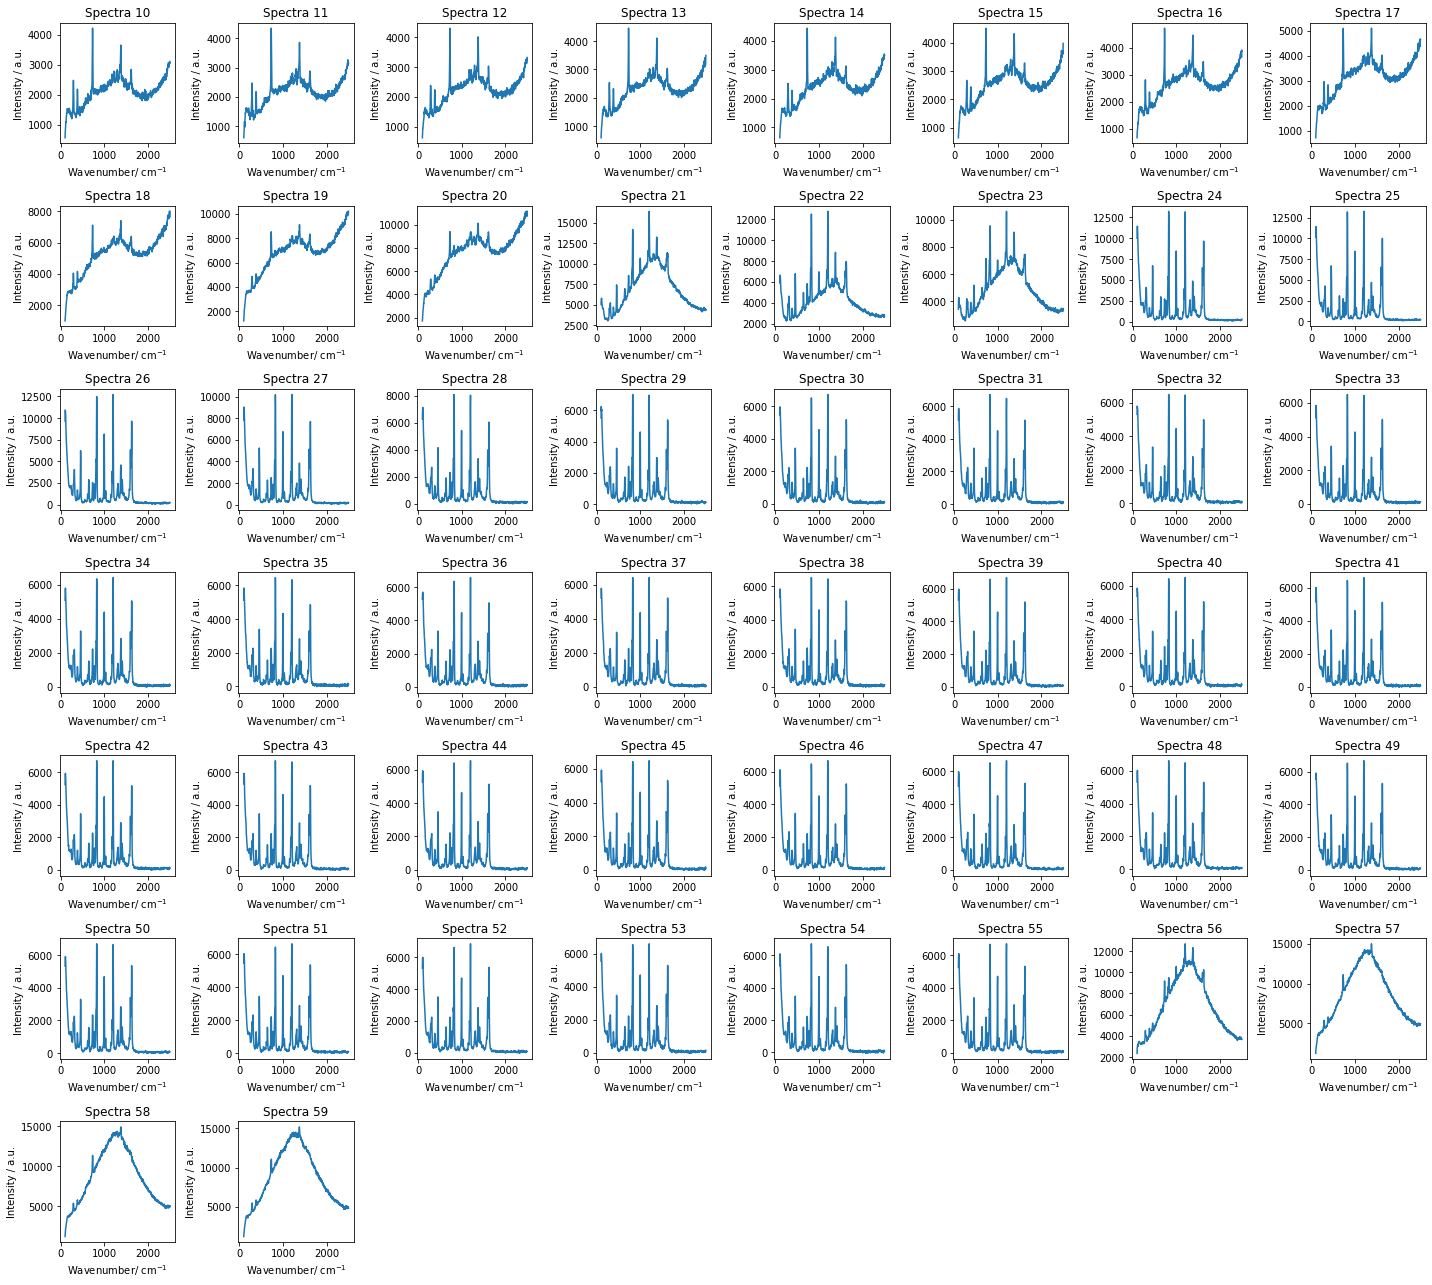

In [7]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(10, 60):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-9))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [8]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[41:50, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =19)
condition1_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
41,19,5154.0,6004.0,5961.0,5654.0,5067.0,4647.0,4139.0,3840.0,3716.0,...,16.0,59.0,73.0,99.0,65.0,107.0,73.0,92.0,37.0,117.0
42,19,5240.0,5865.0,5939.0,5688.0,5199.0,4679.0,4241.0,3912.0,3677.0,...,6.0,72.0,94.0,95.0,52.0,119.0,153.0,90.0,52.0,88.0
43,19,5273.0,5915.0,5869.0,5773.0,5084.0,4483.0,4164.0,3687.0,3569.0,...,15.0,73.0,-5.0,57.0,69.0,104.0,53.0,26.0,61.0,63.0
44,19,5281.0,5867.0,5944.0,5799.0,5077.0,4610.0,4108.0,3837.0,3610.0,...,2.0,84.0,-8.0,93.0,76.0,115.0,37.0,114.0,58.0,108.0
45,19,5257.0,5754.0,5933.0,5676.0,5270.0,4685.0,4258.0,3909.0,3627.0,...,-21.0,89.0,70.0,92.0,117.0,166.0,67.0,74.0,53.0,141.0
46,19,5141.0,6122.0,5946.0,5740.0,4998.0,4759.0,4237.0,3994.0,3602.0,...,6.0,38.0,75.0,37.0,62.0,96.0,26.0,97.0,87.0,136.0
47,19,5106.0,5980.0,5883.0,5691.0,5200.0,4728.0,4294.0,3969.0,3744.0,...,1.0,95.0,107.0,65.0,134.0,94.0,123.0,36.0,28.0,113.0
48,19,5311.0,5860.0,6023.0,5559.0,5154.0,4677.0,4215.0,3883.0,3643.0,...,59.0,82.0,76.0,66.0,34.0,108.0,56.0,89.0,40.0,66.0
49,19,5549.0,5911.0,5744.0,5513.0,5145.0,4662.0,4296.0,3912.0,3599.0,...,57.0,88.0,28.0,98.0,105.0,103.0,80.0,77.0,111.0,107.0
50,19,5328.0,5844.0,5916.0,5738.0,5240.0,4751.0,4412.0,3859.0,3731.0,...,8.0,67.0,59.0,114.0,79.0,113.0,91.0,77.0,42.0,69.0


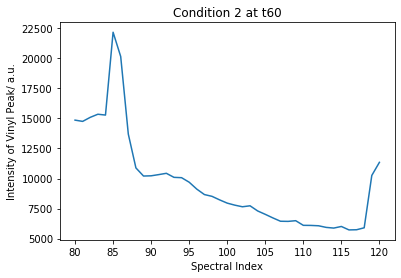

In [9]:
# Condition
df.loc[80:120,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t60')
plt.show()

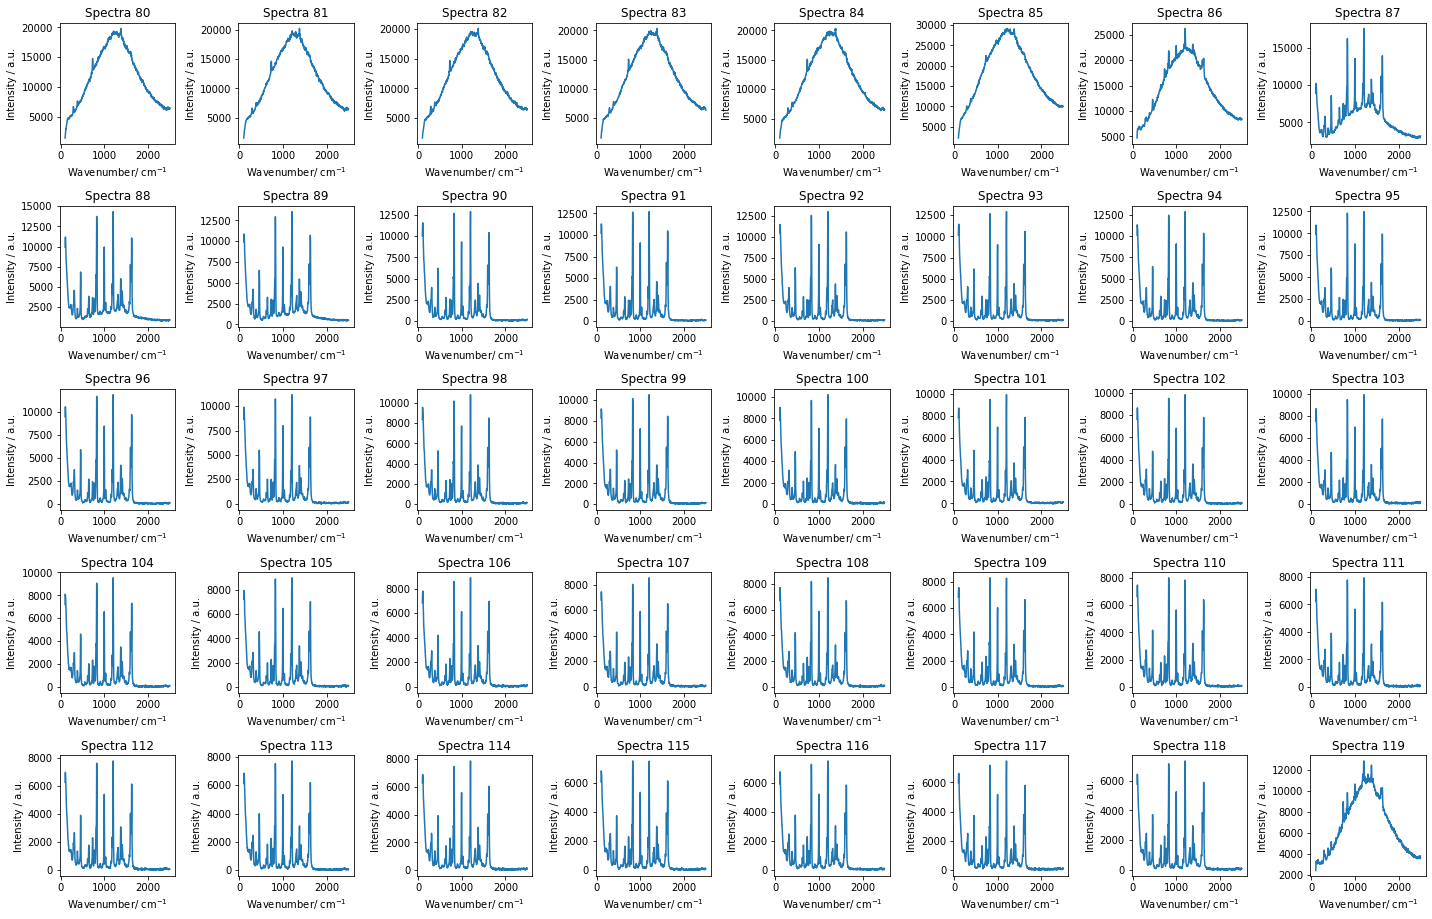

In [10]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(80, 120):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-79))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[101:110, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =20)
condition2_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
101,20,7826.0,8580.0,8684.0,8010.0,7613.0,6677.0,5982.0,5638.0,5159.0,...,17.0,56.0,90.0,106.0,76.0,48.0,126.0,101.0,111.0,140.0
102,20,7627.0,8531.0,8662.0,8251.0,7319.0,6698.0,5954.0,5844.0,5088.0,...,18.0,137.0,132.0,110.0,93.0,171.0,139.0,113.0,40.0,113.0
103,20,7547.0,8412.0,8666.0,7772.0,7346.0,6610.0,6084.0,5376.0,5242.0,...,3.0,96.0,40.0,145.0,116.0,201.0,55.0,100.0,73.0,150.0
104,20,7210.0,8098.0,7968.0,7746.0,7099.0,6497.0,5602.0,5388.0,4878.0,...,76.0,64.0,75.0,139.0,115.0,131.0,88.0,79.0,79.0,120.0
105,20,7221.0,7890.0,7941.0,7498.0,7023.0,6041.0,5786.0,5287.0,4822.0,...,43.0,70.0,67.0,59.0,54.0,160.0,57.0,81.0,100.0,90.0
106,20,6860.0,7592.0,7805.0,7358.0,6766.0,6028.0,5466.0,4960.0,4665.0,...,11.0,106.0,96.0,108.0,101.0,111.0,109.0,130.0,62.0,158.0
107,20,6801.0,7438.0,7445.0,7154.0,6540.0,5823.0,5349.0,4901.0,4529.0,...,-7.0,59.0,83.0,33.0,34.0,48.0,56.0,74.0,51.0,117.0
108,20,6746.0,7721.0,7642.0,7078.0,6618.0,5947.0,5404.0,4881.0,4442.0,...,33.0,74.0,90.0,111.0,97.0,151.0,79.0,104.0,61.0,115.0
109,20,6816.0,7410.0,7548.0,7194.0,6396.0,5701.0,5303.0,4869.0,4395.0,...,29.0,50.0,69.0,96.0,98.0,130.0,94.0,39.0,107.0,83.0
110,20,6631.0,7299.0,7459.0,6902.0,6211.0,5765.0,5176.0,4763.0,4632.0,...,78.0,103.0,91.0,117.0,93.0,117.0,89.0,78.0,72.0,91.0


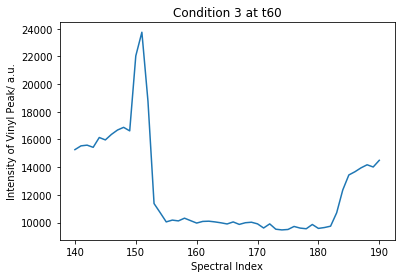

In [12]:
# Condition
df.loc[140:190,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t60')
plt.show()

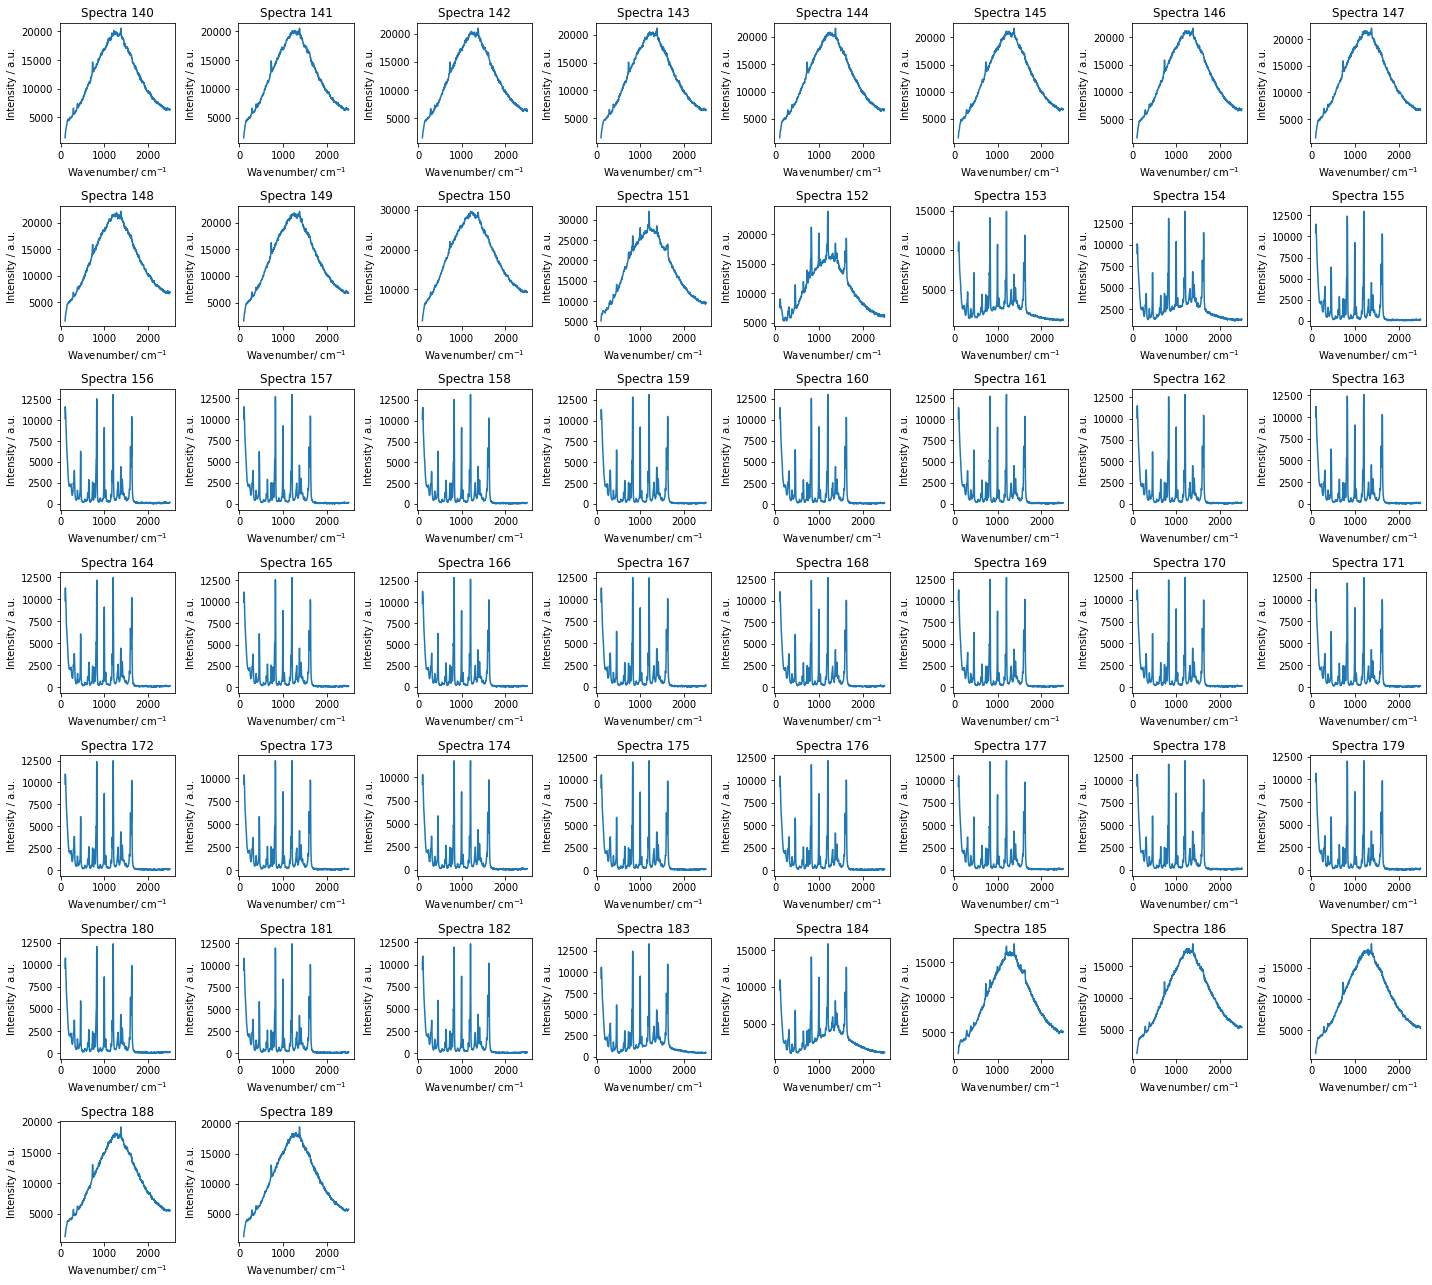

In [13]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(140, 190):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-139))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [14]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[167:176, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =21)
condition3_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
167,21,9716.0,11000.0,11312.0,10445.0,9615.0,8563.0,7934.0,7229.0,6697.0,...,38.0,124.0,109.0,191.0,126.0,201.0,147.0,117.0,112.0,207.0
168,21,10012.0,11037.0,10858.0,10365.0,9528.0,8572.0,7773.0,7249.0,6627.0,...,18.0,116.0,148.0,120.0,75.0,203.0,118.0,139.0,122.0,168.0
169,21,10117.0,11002.0,11266.0,10390.0,9634.0,8709.0,7956.0,7195.0,6616.0,...,73.0,116.0,119.0,174.0,177.0,207.0,140.0,138.0,125.0,145.0
170,21,10011.0,10970.0,11120.0,10486.0,9697.0,8589.0,7958.0,7071.0,6726.0,...,78.0,115.0,112.0,112.0,132.0,148.0,147.0,159.0,73.0,157.0
171,21,9848.0,10975.0,11178.0,10507.0,9474.0,8478.0,7649.0,7175.0,6649.0,...,56.0,119.0,71.0,135.0,178.0,157.0,99.0,113.0,99.0,130.0
172,21,9808.0,10949.0,10859.0,10355.0,9404.0,8433.0,7647.0,7163.0,6608.0,...,61.0,69.0,64.0,156.0,110.0,187.0,122.0,113.0,89.0,131.0
173,21,9375.0,10233.0,10345.0,9875.0,8982.0,8130.0,7419.0,6619.0,6206.0,...,61.0,112.0,84.0,112.0,96.0,162.0,102.0,80.0,114.0,160.0
174,21,9279.0,10320.0,10253.0,9719.0,8898.0,8042.0,7148.0,6599.0,6314.0,...,47.0,82.0,67.0,87.0,153.0,139.0,94.0,94.0,84.0,130.0
175,21,9131.0,10322.0,10572.0,9773.0,9138.0,7994.0,7286.0,6628.0,6304.0,...,89.0,113.0,111.0,148.0,115.0,163.0,85.0,113.0,98.0,136.0
176,21,9350.0,10463.0,10370.0,9853.0,8952.0,8204.0,7345.0,6604.0,6234.0,...,27.0,119.0,69.0,105.0,123.0,130.0,96.0,120.0,83.0,144.0


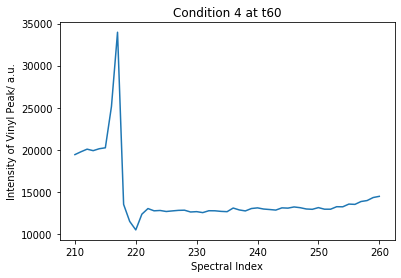

In [15]:
# Condition
df.loc[210:260,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t60')
plt.show()

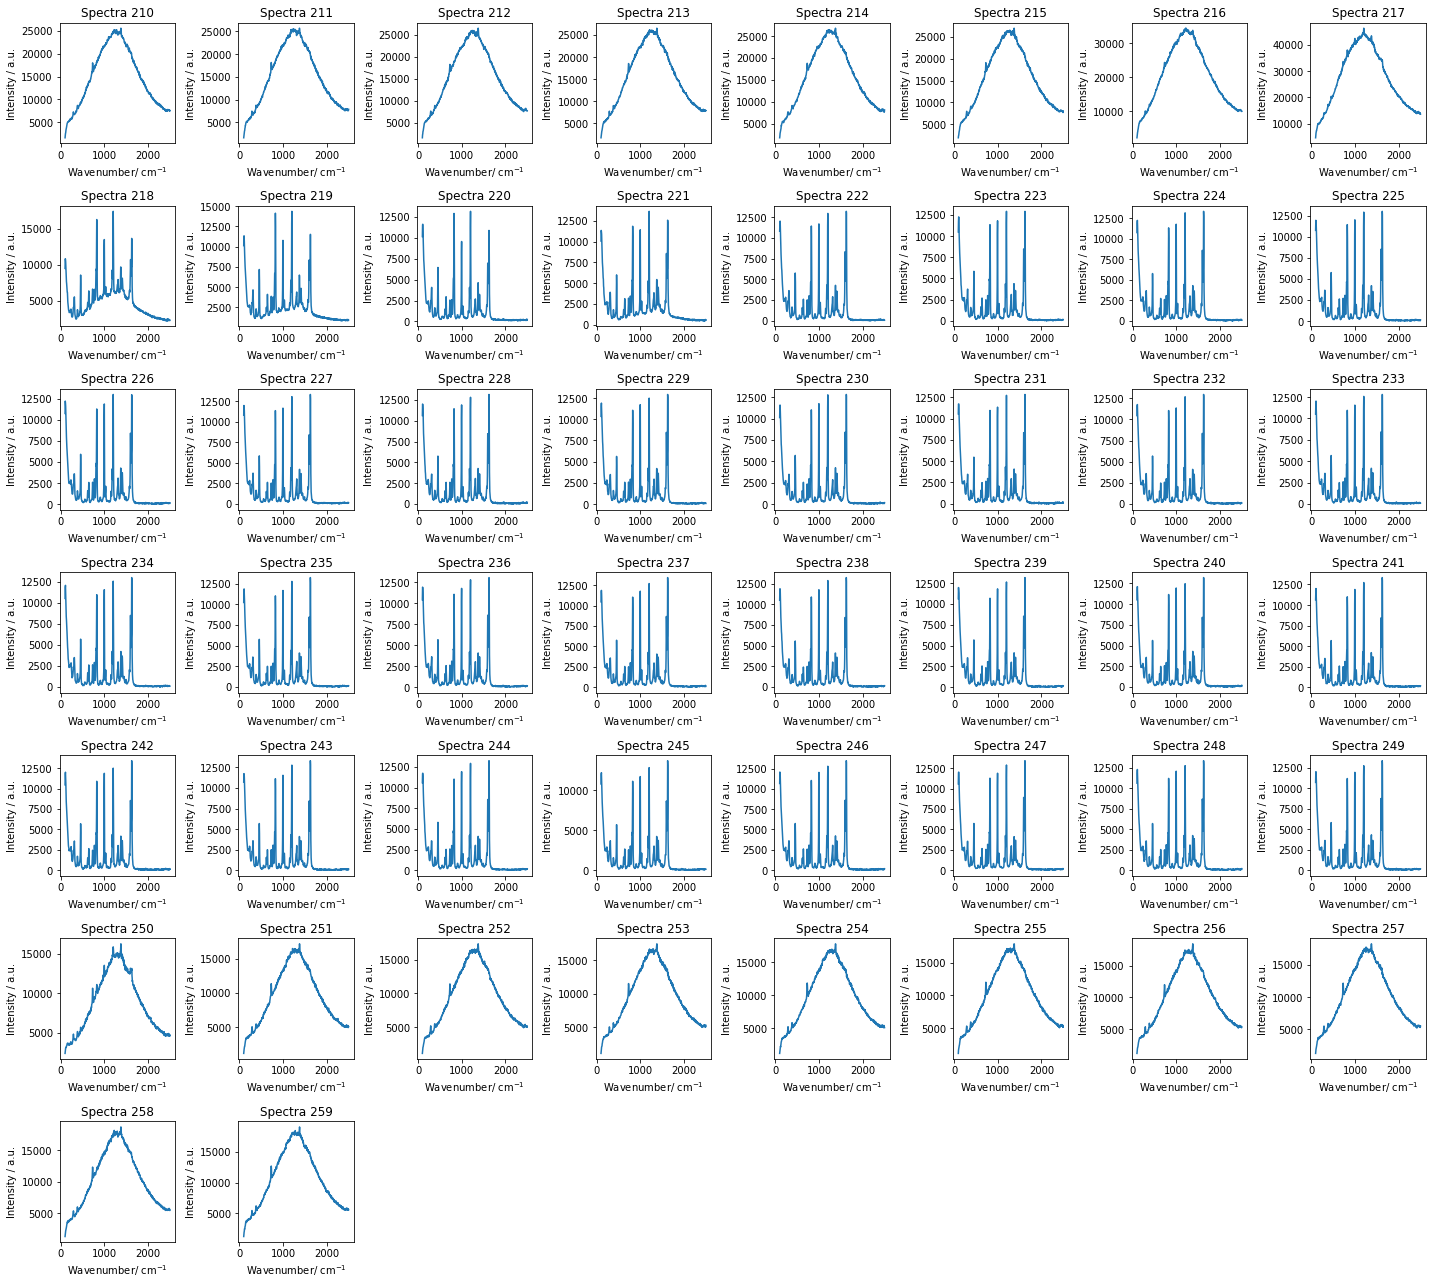

In [16]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(210, 260):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-209))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[236:245, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =22)
condition4_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
236,22,10418.0,11928.0,11870.0,11309.0,10304.0,9198.0,8462.0,7692.0,7390.0,...,64.0,102.0,157.0,134.0,130.0,173.0,132.0,84.0,80.0,126.0
237,22,10465.0,11623.0,11871.0,11503.0,10373.0,9167.0,8450.0,7714.0,7358.0,...,98.0,58.0,136.0,127.0,107.0,211.0,106.0,76.0,54.0,109.0
238,22,10517.0,11846.0,11889.0,11557.0,10340.0,9077.0,8452.0,7689.0,7341.0,...,40.0,120.0,56.0,159.0,93.0,136.0,117.0,159.0,74.0,157.0
239,22,10621.0,11968.0,11565.0,11271.0,10151.0,9363.0,8627.0,7913.0,7314.0,...,25.0,90.0,79.0,146.0,122.0,189.0,105.0,104.0,93.0,135.0
240,22,10531.0,11666.0,12119.0,11255.0,10544.0,9466.0,8512.0,7962.0,7408.0,...,50.0,139.0,98.0,149.0,119.0,167.0,126.0,140.0,55.0,176.0
241,22,10644.0,11654.0,12007.0,11332.0,10400.0,9363.0,8476.0,7826.0,7417.0,...,106.0,95.0,96.0,154.0,152.0,156.0,158.0,127.0,82.0,165.0
242,22,10459.0,11814.0,12004.0,11306.0,10540.0,9216.0,8400.0,7900.0,7332.0,...,20.0,97.0,58.0,135.0,109.0,185.0,55.0,138.0,82.0,125.0
243,22,10738.0,11750.0,11668.0,11364.0,10484.0,9158.0,8581.0,7751.0,7352.0,...,50.0,80.0,67.0,113.0,99.0,165.0,123.0,116.0,27.0,133.0
244,22,10587.0,11669.0,11736.0,11365.0,10564.0,9343.0,8486.0,7839.0,7486.0,...,55.0,83.0,137.0,130.0,118.0,144.0,97.0,128.0,114.0,142.0
245,22,10776.0,11928.0,12179.0,11433.0,10376.0,9318.0,8520.0,7835.0,7483.0,...,109.0,110.0,105.0,131.0,162.0,124.0,103.0,123.0,129.0,129.0


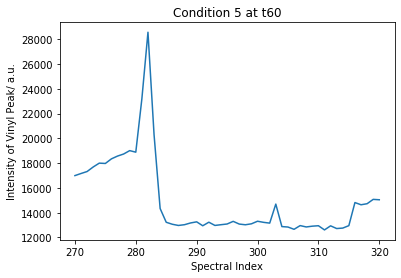

In [18]:
# Condition
df.loc[270:320,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t60')
plt.show()

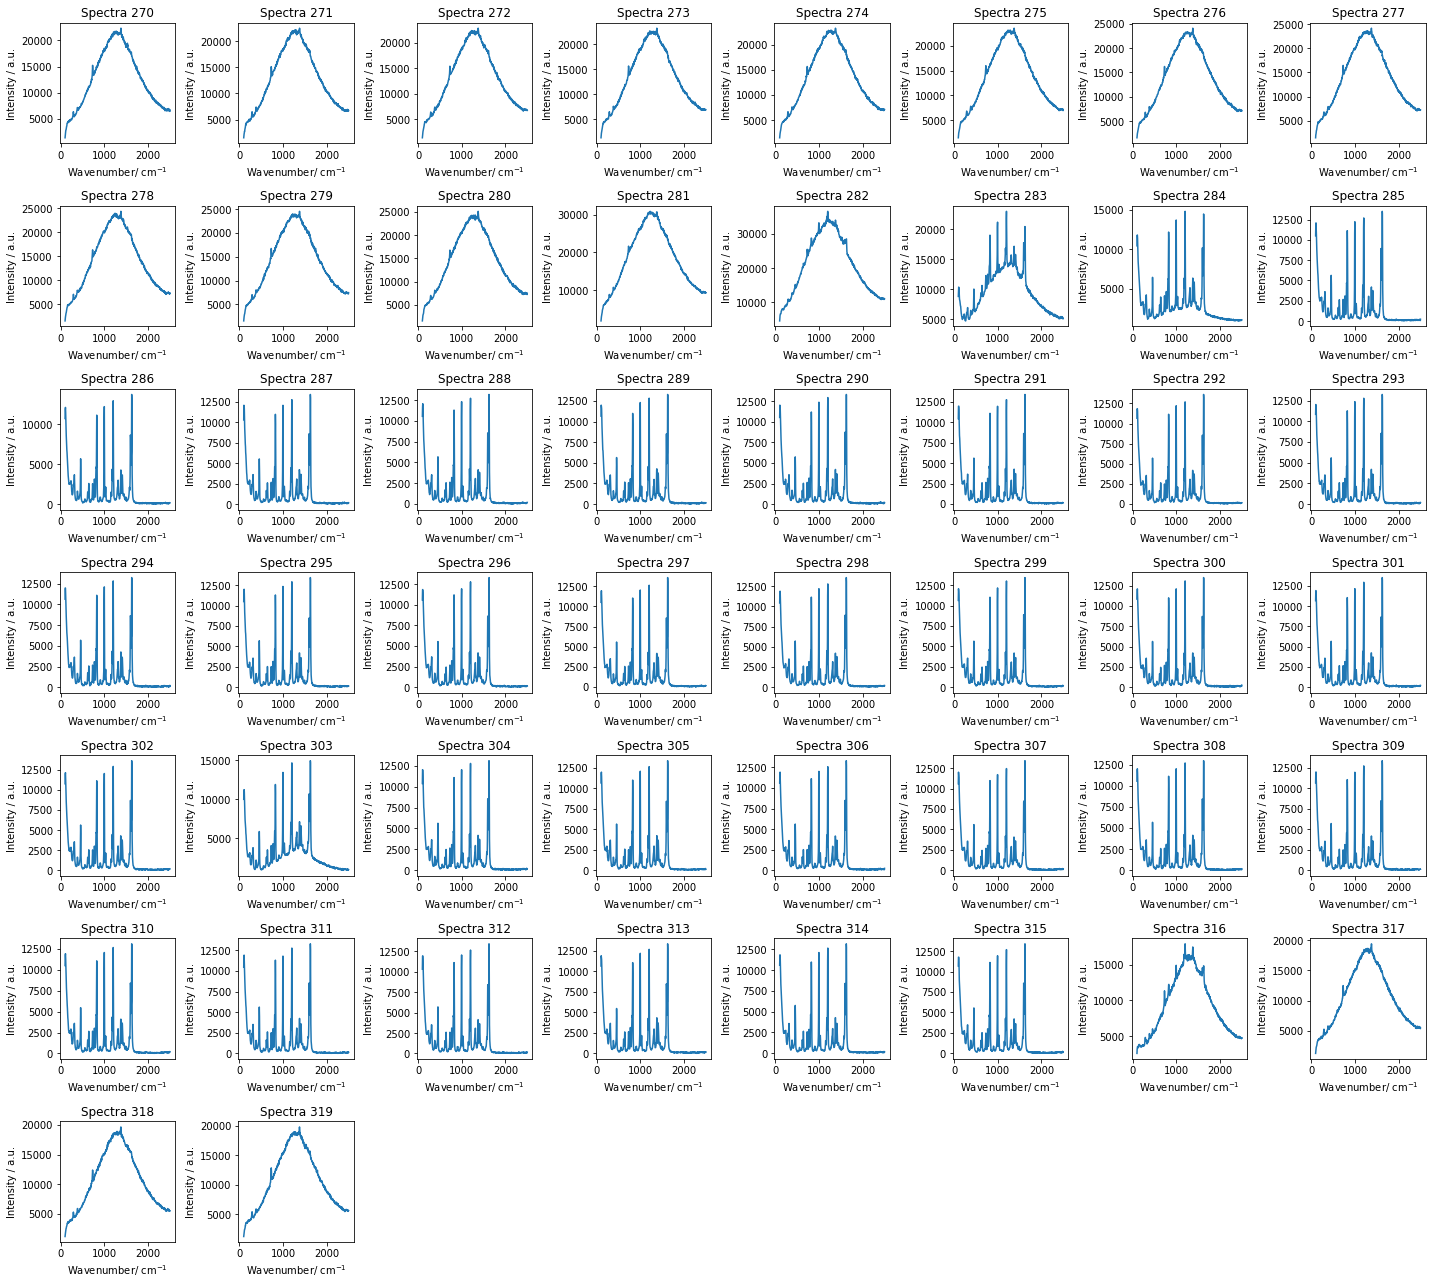

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(270, 320):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-269))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[305:314, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =23)
condition5_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
305,23,10631.0,11791.0,11949.0,11362.0,10176.0,9229.0,8313.0,7868.0,7456.0,...,49.0,131.0,125.0,105.0,156.0,203.0,119.0,74.0,94.0,115.0
306,23,10629.0,11653.0,11932.0,11166.0,10457.0,9254.0,8250.0,7771.0,7111.0,...,90.0,100.0,53.0,135.0,117.0,120.0,95.0,146.0,43.0,208.0
307,23,10591.0,12005.0,11742.0,11348.0,10242.0,9315.0,8534.0,7749.0,7282.0,...,75.0,147.0,127.0,143.0,162.0,217.0,119.0,137.0,97.0,138.0
308,23,10537.0,11768.0,12004.0,11500.0,10339.0,9177.0,8467.0,7856.0,7351.0,...,118.0,83.0,121.0,138.0,127.0,196.0,94.0,112.0,77.0,174.0
309,23,10681.0,11944.0,12009.0,11224.0,10316.0,9406.0,8490.0,7858.0,7462.0,...,24.0,118.0,106.0,105.0,117.0,115.0,125.0,137.0,104.0,114.0
310,23,10518.0,11709.0,11937.0,11400.0,10370.0,9135.0,8701.0,7858.0,7292.0,...,92.0,168.0,91.0,186.0,109.0,162.0,168.0,142.0,129.0,208.0
311,23,10473.0,11773.0,11920.0,11157.0,10506.0,9310.0,8404.0,7773.0,7216.0,...,36.0,132.0,73.0,158.0,136.0,163.0,73.0,150.0,70.0,119.0
312,23,10314.0,11912.0,11953.0,11436.0,10427.0,9338.0,8342.0,7815.0,7306.0,...,53.0,123.0,99.0,118.0,115.0,160.0,138.0,94.0,66.0,159.0
313,23,10616.0,11868.0,11599.0,11412.0,10388.0,9391.0,8605.0,7782.0,7333.0,...,49.0,109.0,116.0,159.0,158.0,163.0,131.0,119.0,78.0,139.0
314,23,10611.0,11823.0,11857.0,11333.0,10252.0,9152.0,8329.0,7779.0,7220.0,...,37.0,98.0,93.0,140.0,125.0,196.0,131.0,114.0,62.0,148.0


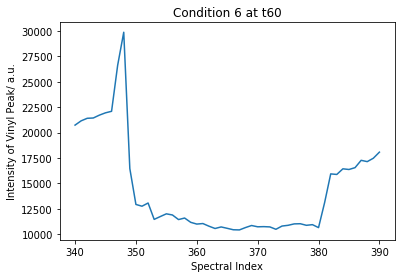

In [21]:
# Condition
df.loc[340:390,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t60')
plt.show()

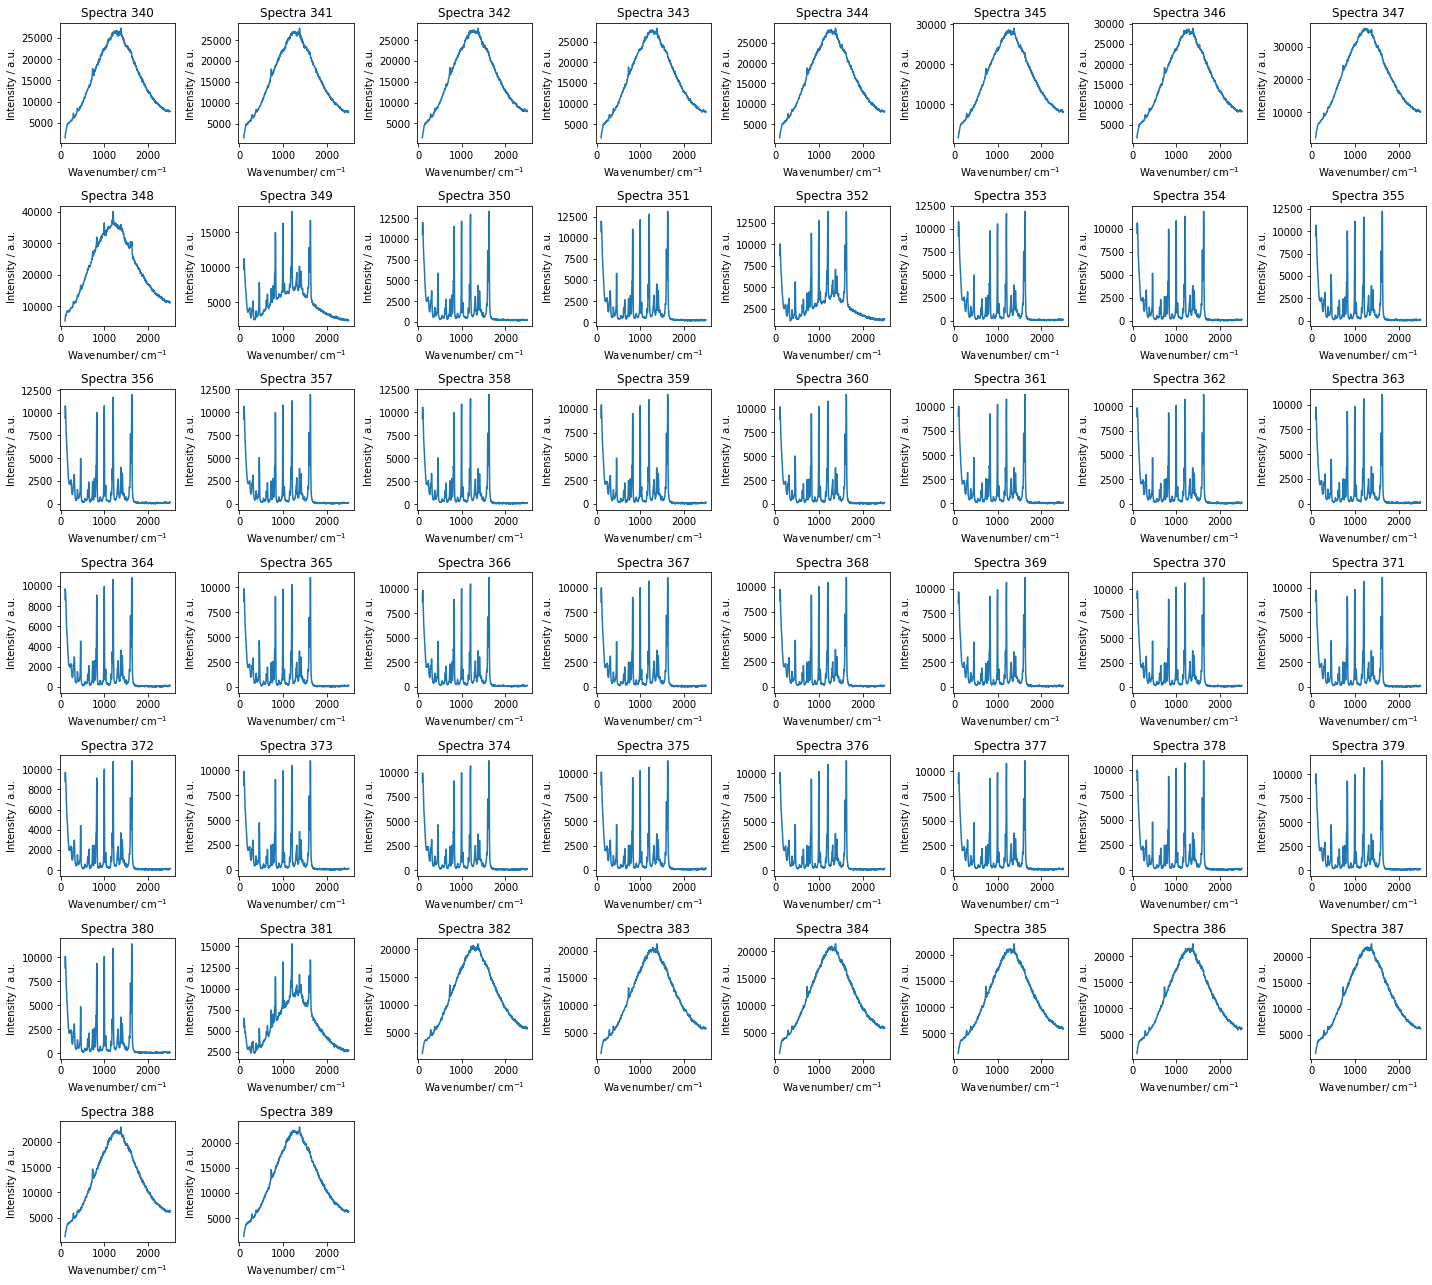

In [22]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(340, 390):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-339))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[368:377, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =24)
condition6_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
368,24,8636.0,9696.0,9739.0,9312.0,8289.0,7655.0,6972.0,6416.0,5984.0,...,41.0,160.0,112.0,110.0,124.0,94.0,105.0,80.0,110.0,112.0
369,24,8567.0,9668.0,9620.0,9333.0,8553.0,7808.0,6880.0,6407.0,5863.0,...,-37.0,96.0,73.0,127.0,103.0,129.0,115.0,53.0,92.0,131.0
370,24,9083.0,9611.0,9830.0,9548.0,8607.0,7799.0,6807.0,6518.0,6053.0,...,55.0,122.0,76.0,120.0,110.0,152.0,106.0,119.0,105.0,150.0
371,24,8659.0,9560.0,9728.0,9370.0,8605.0,7710.0,6978.0,6357.0,5881.0,...,40.0,83.0,98.0,87.0,80.0,172.0,76.0,87.0,68.0,114.0
372,24,8803.0,9660.0,9683.0,9033.0,8608.0,7858.0,7039.0,6404.0,6051.0,...,35.0,94.0,86.0,137.0,80.0,126.0,75.0,132.0,83.0,166.0
373,24,8523.0,9560.0,9876.0,9123.0,8372.0,7453.0,6906.0,6195.0,5980.0,...,44.0,91.0,99.0,103.0,87.0,144.0,91.0,112.0,63.0,147.0
374,24,9012.0,9917.0,9708.0,9446.0,8749.0,7913.0,7095.0,6601.0,5955.0,...,63.0,76.0,101.0,124.0,157.0,139.0,121.0,163.0,85.0,132.0
375,24,8800.0,9725.0,10112.0,9512.0,8547.0,7603.0,7127.0,6527.0,6161.0,...,5.0,86.0,65.0,170.0,94.0,149.0,160.0,97.0,96.0,159.0
376,24,8957.0,9999.0,10050.0,9431.0,8623.0,7641.0,6938.0,6384.0,6038.0,...,36.0,69.0,66.0,100.0,125.0,118.0,89.0,107.0,83.0,180.0
377,24,8800.0,9645.0,9871.0,9242.0,8607.0,7785.0,7153.0,6585.0,6151.0,...,65.0,97.0,128.0,121.0,96.0,218.0,116.0,138.0,40.0,102.0


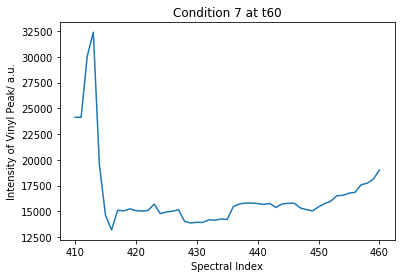

In [24]:
# Condition
df.loc[410:460,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t60')
plt.show()

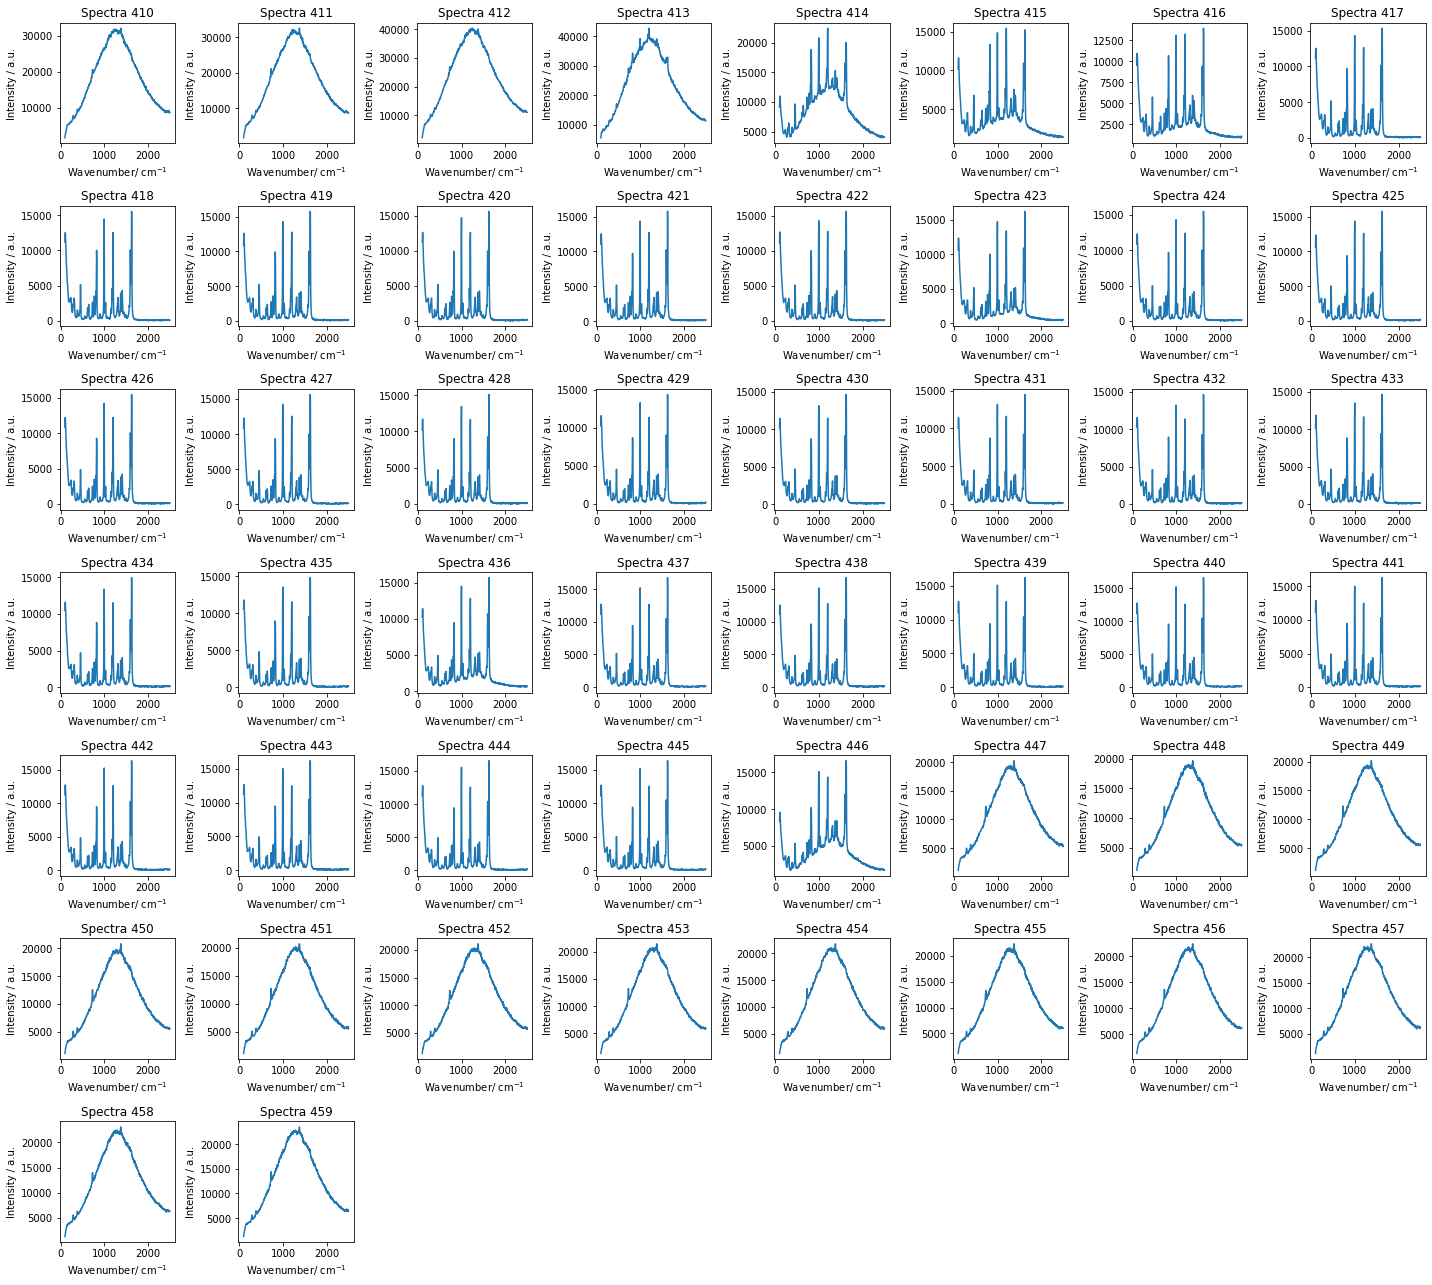

In [25]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(410, 460):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-409))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[426:435, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =25)
condition7_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
426,25,10780.0,12180.0,12194.0,11549.0,10677.0,9622.0,8640.0,8027.0,7555.0,...,95.0,100.0,147.0,133.0,123.0,167.0,158.0,138.0,63.0,113.0
427,25,10829.0,12021.0,12280.0,11609.0,10650.0,9542.0,8758.0,8298.0,7558.0,...,66.0,95.0,142.0,160.0,169.0,144.0,123.0,123.0,122.0,112.0
428,25,10240.0,11336.0,11702.0,10977.0,10119.0,9045.0,8444.0,7610.0,7143.0,...,57.0,133.0,110.0,99.0,112.0,188.0,113.0,135.0,44.0,108.0
429,25,10260.0,11432.0,11606.0,10861.0,10091.0,8866.0,8211.0,7615.0,6999.0,...,59.0,116.0,96.0,89.0,174.0,172.0,132.0,149.0,102.0,187.0
430,25,10107.0,11351.0,11449.0,11047.0,9902.0,8954.0,8154.0,7661.0,7130.0,...,56.0,105.0,117.0,136.0,140.0,186.0,133.0,131.0,94.0,138.0
431,25,10071.0,11435.0,11432.0,11056.0,9994.0,8988.0,8245.0,7564.0,7121.0,...,64.0,94.0,98.0,148.0,133.0,139.0,119.0,110.0,94.0,147.0
432,25,10263.0,11511.0,11532.0,11163.0,10096.0,9042.0,8159.0,7734.0,7299.0,...,59.0,127.0,44.0,164.0,65.0,165.0,116.0,130.0,92.0,148.0
433,25,10120.0,11289.0,11870.0,11065.0,10062.0,9234.0,8336.0,7779.0,7206.0,...,61.0,150.0,77.0,121.0,131.0,172.0,109.0,116.0,101.0,149.0
434,25,10460.0,11397.0,11609.0,11025.0,10064.0,9133.0,8338.0,7716.0,7282.0,...,59.0,151.0,107.0,154.0,171.0,151.0,119.0,175.0,64.0,141.0
435,25,10591.0,11462.0,11790.0,11056.0,10214.0,9303.0,8482.0,7759.0,7131.0,...,61.0,148.0,80.0,141.0,149.0,167.0,136.0,143.0,80.0,181.0


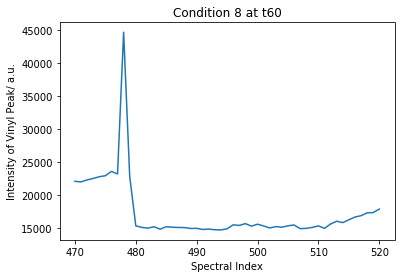

In [27]:
# Condition
df.loc[470:520,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t60')
plt.show()

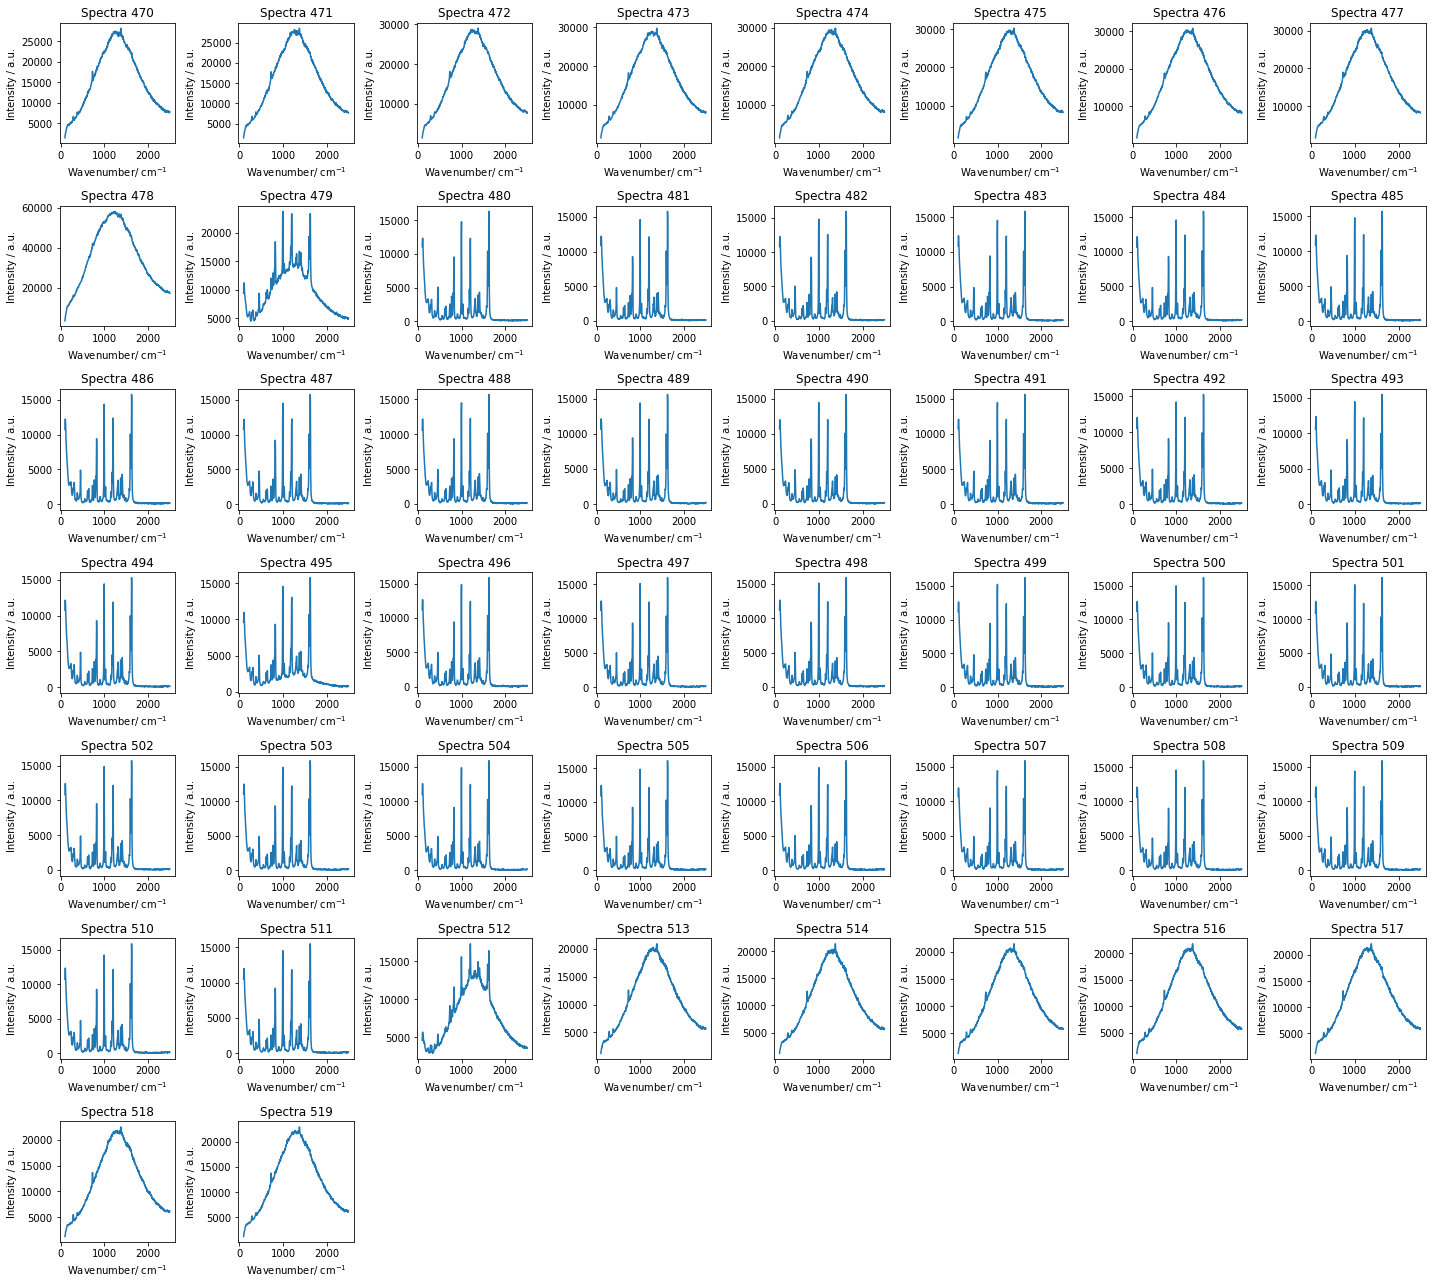

In [28]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(470, 520):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-469))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [29]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[496:505, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =26)
condition8_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
496,26,11211.0,12326.0,12669.0,12002.0,10791.0,9994.0,9195.0,8203.0,7641.0,...,35.0,118.0,93.0,136.0,91.0,181.0,93.0,117.0,46.0,159.0
497,26,11187.0,12230.0,12554.0,11960.0,11192.0,9759.0,9082.0,8317.0,7839.0,...,91.0,113.0,127.0,151.0,135.0,172.0,132.0,133.0,85.0,134.0
498,26,11171.0,12618.0,12629.0,12156.0,11062.0,10148.0,9126.0,8361.0,8075.0,...,74.0,110.0,95.0,140.0,139.0,198.0,126.0,87.0,105.0,196.0
499,26,11180.0,12423.0,12614.0,12141.0,11265.0,10024.0,8920.0,8437.0,7873.0,...,62.0,169.0,142.0,178.0,158.0,213.0,162.0,137.0,91.0,195.0
500,26,11204.0,12263.0,12667.0,12043.0,11039.0,10003.0,9294.0,8284.0,7952.0,...,60.0,146.0,130.0,149.0,124.0,128.0,118.0,107.0,67.0,160.0
501,26,10912.0,12591.0,12443.0,12156.0,10769.0,9952.0,9010.0,8228.0,7859.0,...,20.0,112.0,106.0,153.0,127.0,184.0,112.0,128.0,27.0,128.0
502,26,10841.0,12019.0,12439.0,11992.0,10941.0,9772.0,9008.0,8209.0,7809.0,...,31.0,109.0,162.0,132.0,147.0,188.0,140.0,136.0,92.0,142.0
503,26,11022.0,12371.0,12494.0,12035.0,11059.0,9956.0,9050.0,8204.0,7900.0,...,76.0,133.0,114.0,109.0,152.0,164.0,172.0,142.0,88.0,154.0
504,26,10969.0,12262.0,12530.0,11784.0,10818.0,9970.0,8730.0,8230.0,7949.0,...,52.0,138.0,116.0,117.0,131.0,162.0,120.0,91.0,102.0,180.0
505,26,10944.0,12235.0,12496.0,12106.0,11070.0,9888.0,9088.0,8236.0,7747.0,...,30.0,82.0,102.0,196.0,132.0,125.0,115.0,115.0,100.0,166.0


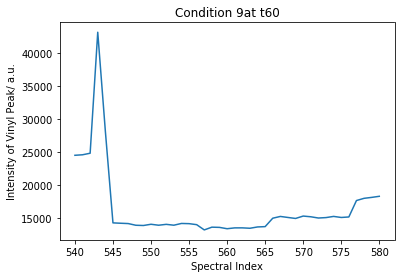

In [30]:
# Condition
df.loc[540:580,'1627.978510'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9at t60')
plt.show()

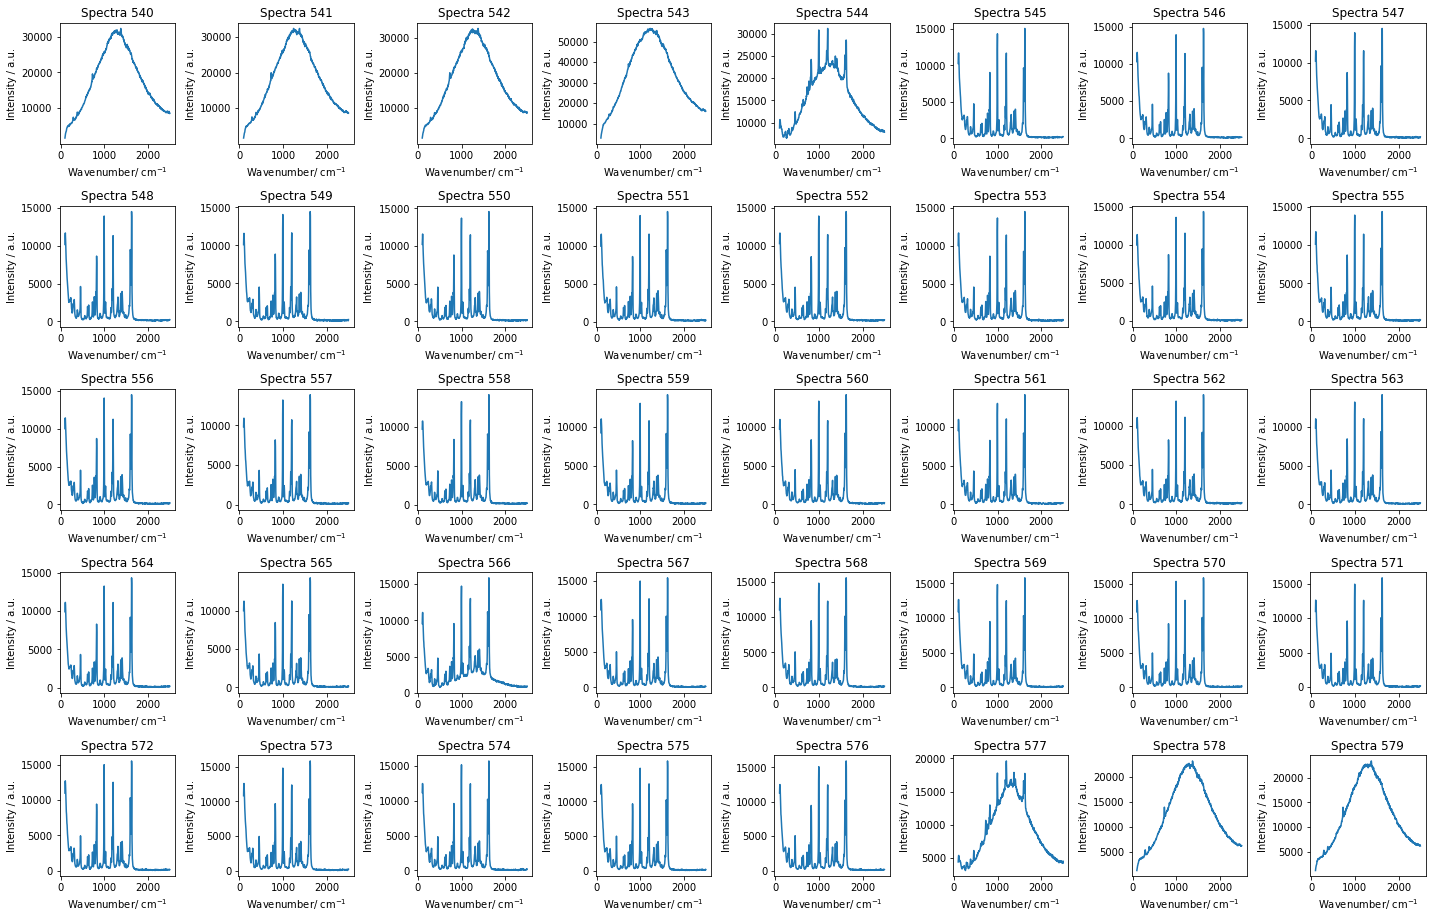

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(540, 580):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-539))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[555:564, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =27)
condition9_ss

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
555,27,10144.0,11475.0,11774.0,10883.0,10097.0,9010.0,8376.0,7571.0,7346.0,...,59.0,149.0,77.0,190.0,147.0,252.0,165.0,209.0,115.0,196.0
556,27,10008.0,11381.0,11428.0,10811.0,9932.0,9092.0,8288.0,7656.0,7045.0,...,59.0,137.0,171.0,128.0,161.0,196.0,168.0,95.0,122.0,211.0
557,27,9824.0,10877.0,10896.0,10382.0,9533.0,8653.0,7767.0,7181.0,6838.0,...,82.0,147.0,107.0,176.0,185.0,167.0,124.0,144.0,85.0,173.0
558,27,9687.0,10695.0,10731.0,10219.0,9747.0,8818.0,7911.0,7396.0,6767.0,...,81.0,134.0,127.0,142.0,183.0,237.0,133.0,143.0,161.0,164.0
559,27,9285.0,11044.0,11073.0,10449.0,9885.0,8690.0,7893.0,7256.0,6745.0,...,47.0,131.0,128.0,162.0,111.0,218.0,141.0,125.0,120.0,180.0
560,27,9697.0,10588.0,10917.0,10391.0,9649.0,8563.0,8005.0,7133.0,6822.0,...,128.0,178.0,137.0,146.0,150.0,238.0,179.0,155.0,93.0,189.0
561,27,9532.0,10904.0,10944.0,10482.0,9627.0,8910.0,7812.0,7250.0,6751.0,...,130.0,130.0,175.0,165.0,155.0,173.0,165.0,150.0,136.0,195.0
562,27,9789.0,10923.0,11102.0,10497.0,9701.0,8749.0,8091.0,7287.0,6872.0,...,59.0,98.0,161.0,164.0,137.0,204.0,99.0,160.0,126.0,205.0
563,27,9864.0,11036.0,10883.0,10656.0,9689.0,8651.0,7812.0,7481.0,7026.0,...,84.0,137.0,164.0,114.0,140.0,171.0,154.0,88.0,102.0,163.0
564,27,9916.0,10829.0,11138.0,10811.0,9744.0,8690.0,7962.0,7287.0,6861.0,...,111.0,174.0,163.0,169.0,193.0,192.0,93.0,143.0,146.0,181.0


In [33]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
41,19,5154.0,6004.0,5961.0,5654.0,5067.0,4647.0,4139.0,3840.0,3716.0,...,16.0,59.0,73.0,99.0,65.0,107.0,73.0,92.0,37.0,117.0
42,19,5240.0,5865.0,5939.0,5688.0,5199.0,4679.0,4241.0,3912.0,3677.0,...,6.0,72.0,94.0,95.0,52.0,119.0,153.0,90.0,52.0,88.0
43,19,5273.0,5915.0,5869.0,5773.0,5084.0,4483.0,4164.0,3687.0,3569.0,...,15.0,73.0,-5.0,57.0,69.0,104.0,53.0,26.0,61.0,63.0
44,19,5281.0,5867.0,5944.0,5799.0,5077.0,4610.0,4108.0,3837.0,3610.0,...,2.0,84.0,-8.0,93.0,76.0,115.0,37.0,114.0,58.0,108.0
45,19,5257.0,5754.0,5933.0,5676.0,5270.0,4685.0,4258.0,3909.0,3627.0,...,-21.0,89.0,70.0,92.0,117.0,166.0,67.0,74.0,53.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,27,9697.0,10588.0,10917.0,10391.0,9649.0,8563.0,8005.0,7133.0,6822.0,...,128.0,178.0,137.0,146.0,150.0,238.0,179.0,155.0,93.0,189.0
561,27,9532.0,10904.0,10944.0,10482.0,9627.0,8910.0,7812.0,7250.0,6751.0,...,130.0,130.0,175.0,165.0,155.0,173.0,165.0,150.0,136.0,195.0
562,27,9789.0,10923.0,11102.0,10497.0,9701.0,8749.0,8091.0,7287.0,6872.0,...,59.0,98.0,161.0,164.0,137.0,204.0,99.0,160.0,126.0,205.0
563,27,9864.0,11036.0,10883.0,10656.0,9689.0,8651.0,7812.0,7481.0,7026.0,...,84.0,137.0,164.0,114.0,140.0,171.0,154.0,88.0,102.0,163.0


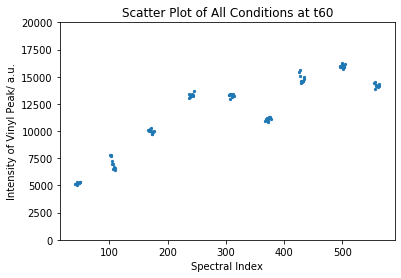

In [39]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t60')
plt.ylim(0, 20000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [35]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [36]:
# Inspect df_.
df_

,Condition,97.978962,102.490177,106.999212,111.503945,116.006503,120.506889,125.002982,129.494787,133.988667,...,2471.804494,2474.967750,2478.128159,2481.288962,2484.448537,2487.605270,2490.762395,2493.916680,2497.066511,2500.218354
41,19,5154.0,6004.0,5961.0,5654.0,5067.0,4647.0,4139.0,3840.0,3716.0,...,16.0,59.0,73.0,99.0,65.0,107.0,73.0,92.0,37.0,117.0
42,19,5240.0,5865.0,5939.0,5688.0,5199.0,4679.0,4241.0,3912.0,3677.0,...,6.0,72.0,94.0,95.0,52.0,119.0,153.0,90.0,52.0,88.0
43,19,5273.0,5915.0,5869.0,5773.0,5084.0,4483.0,4164.0,3687.0,3569.0,...,15.0,73.0,-5.0,57.0,69.0,104.0,53.0,26.0,61.0,63.0
44,19,5281.0,5867.0,5944.0,5799.0,5077.0,4610.0,4108.0,3837.0,3610.0,...,2.0,84.0,-8.0,93.0,76.0,115.0,37.0,114.0,58.0,108.0
45,19,5257.0,5754.0,5933.0,5676.0,5270.0,4685.0,4258.0,3909.0,3627.0,...,-21.0,89.0,70.0,92.0,117.0,166.0,67.0,74.0,53.0,141.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,27,9697.0,10588.0,10917.0,10391.0,9649.0,8563.0,8005.0,7133.0,6822.0,...,128.0,178.0,137.0,146.0,150.0,238.0,179.0,155.0,93.0,189.0
561,27,9532.0,10904.0,10944.0,10482.0,9627.0,8910.0,7812.0,7250.0,6751.0,...,130.0,130.0,175.0,165.0,155.0,173.0,165.0,150.0,136.0,195.0
562,27,9789.0,10923.0,11102.0,10497.0,9701.0,8749.0,8091.0,7287.0,6872.0,...,59.0,98.0,161.0,164.0,137.0,204.0,99.0,160.0,126.0,205.0
563,27,9864.0,11036.0,10883.0,10656.0,9689.0,8651.0,7812.0,7481.0,7026.0,...,84.0,137.0,164.0,114.0,140.0,171.0,154.0,88.0,102.0,163.0


In [37]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1627.978510']].groupby('Condition').describe()

1627.978510                                                   \
                count     mean         std      min       25%      50%   
Condition                                                                
19               10.0   5095.4  117.482103   4938.0   4991.00   5104.0   
20               10.0   6968.6  616.204187   6105.0   6457.25   6871.5   
21               10.0   9746.7  213.093120   9465.0   9538.00   9789.5   
22               10.0  12956.5  128.788586  12726.0  12856.25  12982.0   
23               10.0  12816.9  126.317457  12607.0  12727.25  12843.0   
24               10.0  10783.2  164.651011  10476.0  10713.50  10765.5   
25               10.0  14276.2  446.670348  13880.0  13963.00  14164.5   
26               10.0  15311.2  201.469490  14980.0  15199.25  15294.5   
27               10.0  13611.6  280.376414  13207.0  13472.25  13554.5   

                              
                75%      max  
Condition                     
19          5151.75   5292.0  
20          7563.00   7784.0  
21          9901.50  10020.0  
22         13068.25  13090.0  
23         12930.00  12956.0  
24         10863.00  11024.0  
25         14254.00  15153.0  
26         15434.50  15638.0  
27         13648.00  14156.0

In [38]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201022 High Throughput Experiment Conditions 19 to 27\Online Raman\df_t60.csv')